In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing 
import sklearn.cross_decomposition as cv
from sklearn import linear_model
import sklearn

In [2]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
# print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
# print(breast_cancer_wisconsin_original.variables) 


In [4]:
X.columns

Index(['Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses'],
      dtype='object')

In [5]:
y

,Class
0,2
1,2
2,2
3,2
4,2
...,...
694,2
695,2
696,4
697,4


In [6]:
X = X.fillna (method='bfill')
#X.isnull().sum()

In [7]:
X

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [8]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Train and Test split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

# Linear regression model
lr_breast_cancer = LinearRegression()
lr_breast_cancer.fit(X_train, y_train) 
test_score_lr = lr_breast_cancer.score (X_test, y_test)
print('Linear regression: ', test_score_lr)

# Lasso regression model
lasso_breast_cancer = Lasso() 
lasso_breast_cancer.fit(X_train, y_train)
test_score_lasso = lasso_breast_cancer.score (X_test, y_test)
print('Lasso regression:', test_score_lasso)

#Ridge regression model

Ridge_breast_cancer = Ridge()
Ridge_breast_cancer.fit(X_train, y_train)
test_score_ridge = Ridge_breast_cancer.score (X_test, y_test) 
print('ridge regression:', test_score_ridge)

# ElasticNet regession model
ElasticNet_breast_cancer = ElasticNet()
ElasticNet_breast_cancer.fit(X_train, y_train) 
test_score_elasticnet = ElasticNet_breast_cancer.score (X_test, y_test)
print('Elasticnet regression:', test_score_elasticnet)

Linear regression:  0.8476271546087323
Lasso regression: 0.6716297586989624
ridge regression: 0.8476223975364234
Elasticnet regression: 0.796982484129331


In [19]:
## prediction 
y_pred_BC_lr = np.round(lr_breast_cancer.predict(X_test))
y_pred_BC_lr.shape

(175, 1)

In [20]:
y_pred_BC_lasso = np.round(lasso_breast_cancer.predict(X_test))
y_pred_BC_lasso

array([3., 4., 3., 3., 2., 4., 3., 2., 3., 2., 2., 3., 2., 3., 3., 2., 3.,
       3., 4., 4., 2., 2., 2., 4., 2., 2., 2., 2., 2., 4., 4., 2., 2., 2.,
       2., 2., 2., 2., 2., 3., 2., 2., 2., 4., 2., 3., 3., 2., 2., 4., 2.,
       3., 2., 4., 3., 3., 2., 2., 2., 3., 2., 4., 2., 3., 2., 4., 3., 3.,
       3., 2., 3., 4., 3., 3., 2., 3., 2., 3., 2., 3., 4., 2., 2., 2., 2.,
       2., 4., 2., 3., 2., 2., 3., 3., 3., 3., 3., 3., 2., 2., 2., 2., 4.,
       2., 3., 2., 2., 3., 2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 3., 2.,
       2., 2., 2., 3., 3., 2., 4., 3., 3., 2., 2., 3., 3., 3., 2., 2., 2.,
       2., 3., 2., 2., 2., 2., 2., 4., 3., 2., 2., 2., 2., 4., 2., 2., 2.,
       2., 2., 4., 3., 3., 3., 4., 4., 3., 2., 2., 3., 4., 2., 3., 2., 2.,
       2., 2., 3., 3., 2.])

In [11]:
y_test

,Class
38,4
175,4
648,4
268,4
638,2
...,...
518,2
646,2
316,4
465,4


C:\Users\Shubh\AppData\Local\Temp\ipykernel_10172\2620394713.py:1: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-ko" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(y_pred_BC_lr,'-ko',linestyle = 'none')
C:\Users\Shubh\AppData\Local\Temp\ipykernel_10172\2620394713.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-ko" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(y_test,'-ko',linestyle = 'none',color = 'red')
C:\Users\Shubh\AppData\Local\Temp\ipykernel_10172\2620394713.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(y_test,'-ko',linestyle = 'none',color = 'red')


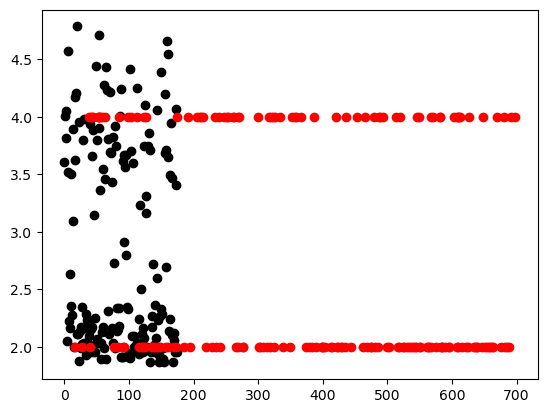

In [17]:
plt.plot(y_pred_BC_lr,'-ko',linestyle = 'none')
plt.plot(y_test,'-ko',linestyle = 'none',color = 'red')

C:\Users\Shubh\AppData\Local\Temp\ipykernel_10172\3707255447.py:1: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-ko" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(y_pred_BC_lasso,'-ko',linestyle = 'none')
C:\Users\Shubh\AppData\Local\Temp\ipykernel_10172\3707255447.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-ko" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(y_test,'-ko',linestyle = 'none',color = 'red');
C:\Users\Shubh\AppData\Local\Temp\ipykernel_10172\3707255447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(y_test,'-ko',linestyle = 'none',color = 'red');


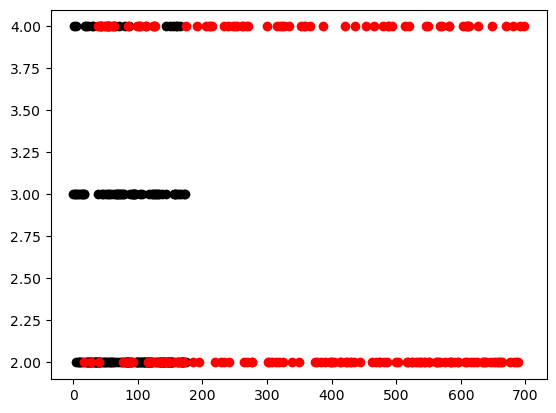

In [22]:
plt.plot(y_pred_BC_lasso,'-ko',linestyle = 'none')
plt.plot(y_test,'-ko',linestyle = 'none',color = 'red');

In [ ]:
y_pred_BC_lasso = np.round(lasso_breast_cancer.predict(X_test))
y_pred_BC_lasso